In [1]:
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import random

import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = np.array([[random.randint(1,400) for i in range(2)] for j in range(50)])

data2 = np.array([[random.randint(300,700) for i in range(2)] for j in range(50)])

data3 = np.array([[random.randint(600,900) for i in range(2)] for j in range(50)])

data = np.append(np.append(data1,data2,axis=0),data3,axis=0)

In [3]:
data.shape

(150, 2)

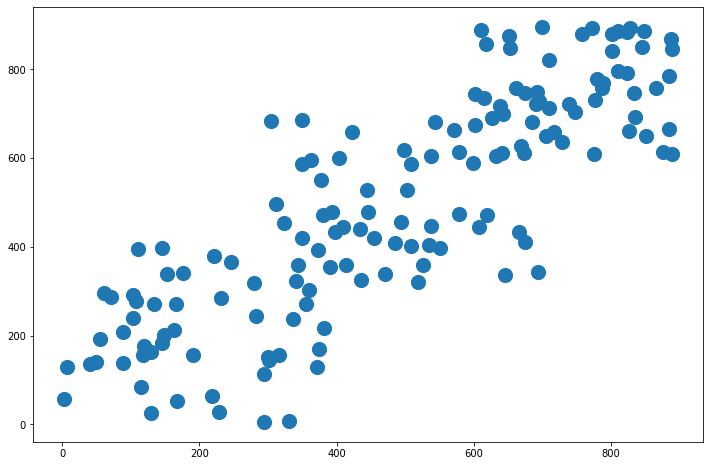

In [4]:
fig ,ax = plt.subplots(figsize = (12,8))

plt.scatter(data[:,0],data[:,1],s=200)

In [12]:
labels_1 = np.array([0 for i in range(50)])

labels_2 = np.array([1 for i in range(50)])

labels_3 = np.array([2 for i in range(50)])

labels = np.append(np.append(labels_1,labels_2,axis=0),labels_3,axis=0)

In [13]:
df = pd.DataFrame({'data_x' : data[:,0], 'data_y' : data[:,1], 'labels' : labels})

df.sample(10)

,data_x,data_y,labels
112,758,879,2
92,534,403,1
137,668,627,2
19,371,129,0
83,494,456,1
12,163,213,0
74,311,497,1
85,544,681,1
17,300,152,0
140,801,841,2


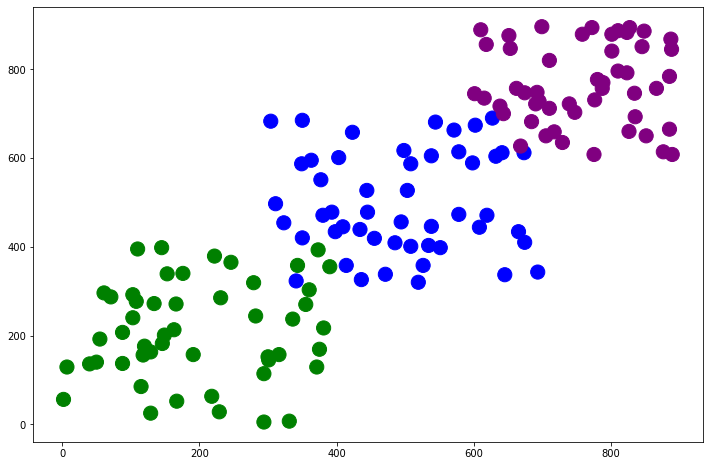

In [14]:
colors = ['green','blue','purple']

plt.figure(figsize=(12,8))

plt.scatter(df['data_x'],df['data_y'],c=df['labels'],s=200,cmap=matplotlib.colors.ListedColormap(colors))

In [15]:
kmeans_model = KMeans(n_clusters=3,max_iter=10000).fit(data)

In [16]:
kmeans_model.labels_

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
centroids = kmeans_model.cluster_centers_

centroids

array([[740.10526316, 749.54385965],
       [183.65217391, 197.80434783],
       [465.93617021, 464.21276596]])

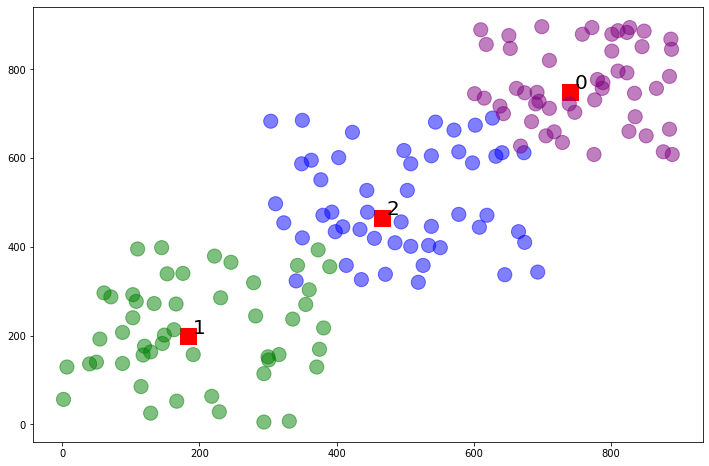

In [22]:
fig,ax = plt.subplots(figsize=(12,8))

plt.scatter(centroids[:,0],centroids[:,1],c='r',s=250,marker='s')

plt.scatter(df['data_x'],df['data_y'],c=df['labels'],s=200,cmap=matplotlib.colors.ListedColormap(colors),alpha=0.5)

for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] + 7,centroids[i][1] + 7),fontsize=20)

In [20]:
print('Homogeneity_score: ',metrics.homogeneity_score(labels,kmeans_model.labels_))

print('Completeness_score: ',metrics.completeness_score(labels,kmeans_model.labels_))

print('v_measure_score: ',metrics.v_measure_score(labels,kmeans_model.labels_))

print('AR_score: ',metrics.adjusted_rand_score(labels,kmeans_model.labels_))

print('adjusted_mutual_info_score: ',metrics.adjusted_mutual_info_score(labels,kmeans_model.labels_))

print('silhouette_score: ',metrics.silhouette_score(data,kmeans_model.labels_))

Homogeneity_score:  0.7881475495771759
Completeness_score:  0.7916298990108916
v_measure_score:  0.7898848861719017
AR_score:  0.7963826204017712
adjusted_mutual_info_score:  0.7872489124271455
silhouette_score:  0.5116969216104698


In [27]:
data_test = np.array([[442.,621.],[50.,153.],[333,373.],[835,816]])

In [28]:
labels_pred = kmeans_model.predict(data_test)

In [29]:
labels_pred

array([2, 1, 2, 0])

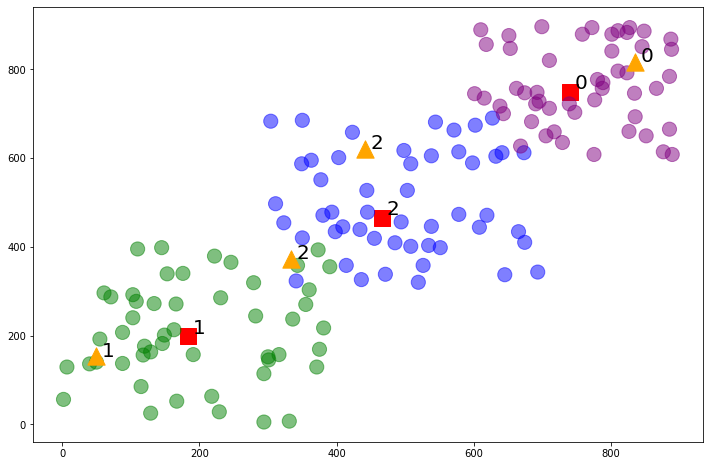

In [30]:
fig,ax = plt.subplots(figsize=(12,8))

plt.scatter(centroids[:,0],centroids[:,1],c='r',s=250,marker='s')

plt.scatter(df['data_x'],df['data_y'],c=df['labels'],s=200,cmap=matplotlib.colors.ListedColormap(colors),alpha=0.5)

plt.scatter(data_test[:,0],data_test[:,1],c='orange',s=300,marker='^')

for i in range(len(data_test)):
    plt.annotate(labels_pred[i],(data_test[i][0] + 8,data_test[i][1]),fontsize=20)

for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] + 7,centroids[i][1] + 7),fontsize=20)